#                   MODELO DE REGRESIÓN LOGÍSTICA (COVID-19)
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Valoración de las clases en modalidad virtual (versión 2).csv", sep=",")
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="1" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="2" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="3" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="4" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="5" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="6" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="7" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="8" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="9" , "yes", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="0" , "no", data["REPROBADAS"])
data["REPROBADAS"]= np.where(data["REPROBADAS"]=="1" , "yes", data["REPROBADAS"])

In [4]:
data["REPROBADAS"]=(data["REPROBADAS"]=="yes").astype(int)
data.head()


,SEMESTRE,EDAD,SEXO,MINORIA,ESTADO CIVIL,ZONA Rural,NÚMERO DE PERSONAS EN EL HOGAR,INGRESOS,AFECTACIÓN ECONÓMICA,EDUCACIÓN PADRE,...,TRATAMIENTO,POSITIVO A COVID,DECESOS,CONTACTO CON AMIGOS,REPROBADAS,CALIFICACIONES,TIEMPO DE ESTUDIO,BAJA T O D,REACCIÓN UAEH,CONDICIONES
0,7,22,Masculino,0,Soltera(o),0,6,3,0,1,...,0,0,0,2,0,3,1,1,3,0
1,2,18,Masculino,0,Soltera(o),0,5,4,1,4,...,1,0,0,5,0,2,1,1,4,0
2,2,19,Masculino,0,Soltera(o),0,4,2,0,4,...,0,1,0,5,1,2,3,0,4,1
3,2,18,Femenino,0,Soltera(o),1,2,3,0,3,...,0,0,0,2,0,3,3,0,5,1
4,2,19,Masculino,0,Soltera(o),1,5,2,0,1,...,0,1,0,2,0,2,1,1,4,0


# Conversión de las variables categoricas a variables dummies

In [5]:
import pandas as pd
categories=["SEXO","ESTADO CIVIL", "DISPOSITIVO", "TIPO DE POSESIÓN"]
for category in categories:
    cat_list= "cat"+ "_" +category
    cat_dummies = pd.get_dummies(data[category], prefix=cat_list)
    data_new=data.join(cat_dummies)
    data=data_new
    data_vars=data.columns.values.tolist()
to_keep= [v for v in data_vars if v not in categories]
bank_data=data[to_keep]
bank_data.columns.values
bank_data
bank_data_vars =bank_data.columns.values.tolist()
Y=["REPROBADAS"]

eliminar=["cat_SEXO_Otro","cat_MINORIA_No","cat_ESTADO CIVIL_Unión libre","cat_ZONA_Urbana","cat_INGRESOS_Más de $12000", 
         "cat_AFECTACIÓN ECONÓMICA_No", "cat_EDUCACIÓN PADRE_Superior","cat_EDUCACIÓN MADRE_No puedo/quiero responder",
          "cat_DISPOSITIVO_Tableta","cat_TIPO DE POSESIÓN_Propio","cat_ACTIVIDAD EXTRA_No", 
          "cat_POSITIVO A COVID_No quiero responder", "cat_DECESOS_No quiero responder", "cat_CALIFICACIONES_Iguales", 
          "cat_TIEMPO DE ESTUDIO_Iguales","cat_TRATAMIENTO_No", "cat_BAJA T O D_No", "cat_CONDICIONES_No"]
X=[v for v in bank_data_vars if v not in Y and v not in eliminar]

['SEMESTRE',
 'EDAD',
 'MINORIA',
 'ZONA Rural',
 'NÚMERO DE PERSONAS EN EL HOGAR',
 'INGRESOS',
 'AFECTACIÓN ECONÓMICA',
 'EDUCACIÓN PADRE',
 'EDUCACIÓN MADRE',
 'FUNCIONALIDAD DEL DISPOSITIVO',
 'AMBIENTE',
 'SEÑAL',
 'ACTIVIDAD EXTRA',
 'ESTRÉS',
 'DEPRESIÓN',
 'ANSIEDAD',
 'TRATAMIENTO',
 'POSITIVO A COVID',
 'DECESOS',
 'CONTACTO CON AMIGOS',
 'CALIFICACIONES',
 'TIEMPO DE ESTUDIO',
 'BAJA T O D',
 'REACCIÓN UAEH',
 'CONDICIONES',
 'cat_SEXO_Femenino',
 'cat_SEXO_Masculino',
 'cat_ESTADO CIVIL_Casada(o)',
 'cat_ESTADO CIVIL_Soltera(o)',
 'cat_DISPOSITIVO_Computadora de escritorio',
 'cat_DISPOSITIVO_Laptop',
 'cat_DISPOSITIVO_Smartphone',
 'cat_TIPO DE POSESIÓN_Ciber',
 'cat_TIPO DE POSESIÓN_Prestado']

# Selección de rasgos para el modelo

In [7]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
n=12
lr=LogisticRegression()
rfe= RFE(lr,n)
rfe=rfe.fit(bank_data[X], bank_data[Y])
R=rfe.ranking_
M=np.asarray(list(zip(R,X)))
M=pd.DataFrame(M)
M

,0,1
0,2,SEMESTRE
1,1,EDAD
2,17,MINORIA
3,8,ZONA Rural
4,13,NÚMERO DE PERSONAS EN EL HOGAR
5,15,INGRESOS
6,1,AFECTACIÓN ECONÓMICA
7,14,EDUCACIÓN PADRE
8,3,EDUCACIÓN MADRE
9,19,FUNCIONALIDAD DEL DISPOSITIVO


In [212]:
cols= "["
contador=1
for renglones in range (0,33):
    for columnas in range (0,1):
        if M[columnas][renglones]=="1":
            if contador == 1:
                cols= cols + '"'+ M[1][renglones]+ '"'  
                contador=2
            else:
                cols= cols+','+'"'+M[1][renglones]+'"'  
            
cols=cols+ "]"
cols=["SEMESTRE","EDAD","AFECTACIÓN ECONÓMICA","CALIFICACIONES","TIEMPO DE ESTUDIO","BAJA T O D","REACCIÓN UAEH","cat_SEXO_Femenino","cat_ESTADO CIVIL_Soltera(o)","cat_DISPOSITIVO_Computadora de escritorio","cat_DISPOSITIVO_Laptop","cat_TIPO DE POSESIÓN_Ciber"]

In [213]:
X=bank_data[cols]
Y=bank_data["REPROBADAS"]


# IMPLEMENTACIÓN DEL MODELO

In [214]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result= logit_model.fit()
result.summary2()


Optimization terminated successfully.
         Current function value: 0.571077
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
=========================================================================================
Model:                      Logit                    Pseudo R-squared:         0.160     
Dependent Variable:         REPROBADAS               AIC:                      476.2932  
Date:                       2022-01-10 10:49         BIC:                      524.0702  
No. Observations:           396                      Log-Likelihood:           -226.15   
Df Model:                   11                       LL-Null:                  -269.29   
Df Residuals:               384                      LLR p-value:              8.8555e-14
Converged:                  1.0000                   Scale:                    1.0000    
No. Iterations:             6.0000                                                       
-----------------------------------------------------------------------------------------
                                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------------
SEMESTRE                                  -0.1612   0.0602 -2.6777 0.0074 -0.2792 -0.0432
EDAD                                       0.1244   0.0508  2.4486 0.0143  0.0248  0.2240
AFECTACIÓN ECONÓMICA                      -0.7056   0.3261 -2.1637 0.0305 -1.3447 -0.0664
CALIFICACIONES                            -1.1081   0.2192 -5.0547 0.0000 -1.5378 -0.6785
TIEMPO DE ESTUDIO                         -0.3806   0.1202 -3.1671 0.0015 -0.6161 -0.1451
BAJA T O D                                 0.5101   0.2505  2.0367 0.0417  0.0192  1.0010
REACCIÓN UAEH                              0.1766   0.1143  1.5456 0.1222 -0.0474  0.4006
cat_SEXO_Femenino                         -0.2924   0.2447 -1.1947 0.2322 -0.7720  0.1873
cat_ESTADO CIVIL_Soltera(o)                0.2990   0.9136  0.3272 0.7435 -1.4917  2.0896
cat_DISPOSITIVO_Computadora de escritorio -0.7330   0.4054 -1.8081 0.0706 -1.5275  0.0616
cat_DISPOSITIVO_Laptop                    -0.3410   0.2717 -1.2551 0.2094 -0.8734  0.1915
cat_TIPO DE POSESIÓN_Ciber                 0.6712   0.7092  0.9465 0.3439 -0.7187  2.0611
=========================================================================================

"""

In [235]:
from sklearn import linear_model
logit_model= linear_model.LogisticRegression()
logit_model.fit(X,Y)
logit_model.score(X,Y)

0.7196969696969697

In [250]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_), np.transpose(np.exp(logit_model.coef_)))))

,0,1,2
0,SEMESTRE,[-0.198051362364171],[0.8203277180847665]
1,EDAD,[0.2323314200896835],[1.2615377585098502]
2,AFECTACIÓN ECONÓMICA,[-0.5846492709780202],[0.5573012892752647]
3,CALIFICACIONES,[-1.0285576871208613],[0.3575222478197095]
4,TIEMPO DE ESTUDIO,[-0.3586283203623184],[0.6986339711221524]
5,BAJA T O D,[0.5419854583248992],[1.7194173068224725]
6,REACCIÓN UAEH,[0.21283227269536406],[1.2371771254556068]
7,cat_SEXO_Femenino,[-0.2116628028757708],[0.8092375241317037]
8,cat_ESTADO CIVIL_Soltera(o),[0.6082974541045734],[1.8373006457394478]
9,cat_DISPOSITIVO_Computadora de escritorio,[-0.5899388570466849],[0.5543611789779853]


In [237]:
1-Y.mean()

0.5808080808080809

In [238]:
from sklearn.model_selection import train_test_split
from IPython.display import display, Math, Latex
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
lm= linear_model.LogisticRegression()
lm.fit(X_train, Y_train)
probs= lm.predict_proba(X_test)
prediction= lm.predict(X_test)
prediction
from sklearn import metrics
metrics.accuracy_score(Y_test, prediction)

0.6375

# VALIDACIÓN CRUZADA

In [239]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(linear_model.LogisticRegression(), X, Y, scoring= "accuracy", cv=10)
pres=cross_val_score(linear_model.LogisticRegression(), X, Y, scoring= "precision", cv=10)
recall=cross_val_score(linear_model.LogisticRegression(), X, Y, scoring= "recall", cv=10)
f1=cross_val_score(linear_model.LogisticRegression(), X, Y, scoring= "f1", cv=10)
scores= acc,pres,recall,f1
means=acc.mean(),pres.mean(),recall.mean(),f1.mean()
means

(0.6919230769230769,
 0.6590475056419329,
 0.5716911764705882,
 0.6096841209602121)

# MATRICES DE CONFUSIÓN Y CURVAS ROC

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
lm= linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [241]:
probs= lm.predict_proba(X_test)
prob=probs[:,1]
prob_df=pd.DataFrame(prob)
umbral= 0.25
prob_df["prediction"] = np.where(prob_df[0]>=umbral,1,0)
prob_df["actual"]= list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.176964,0,0
1,0.791382,1,1
2,0.174438,0,1
3,0.038152,0,0
4,0.399636,1,1


In [242]:
confusion_matrix= pd.crosstab(prob_df.actual, prob_df.prediction)
confusion_matrix

prediction,0,1
actual,,
0,21,25
1,5,29


In [243]:

TN=confusion_matrix[0][0] #verdaderos negativo
TP=confusion_matrix[1][1] #verdaderos positivos
FN=confusion_matrix[0][1] #falsos negativos
FP=confusion_matrix[1][0] #falsos positivos
FN

5

In [244]:
Accuracy=(TP+TN)/(TP+TN+FN+FP)
Accuracy

0.625

In [245]:
Presicion= TP/(TP+FP)
Presicion

0.5370370370370371

In [246]:
Recall= TP/(TP+FN)
Recall

0.8529411764705882

In [247]:
Specifity=TN/(TP+FP)
Specifity

0.3888888888888889

In [248]:
F1= 2*(Presicion*Recall)/(Presicion+Recall)
F1

0.6590909090909091

In [249]:
espc_1= TN/(TN+FP)
espc_1

0.45652173913043476

In [230]:
umbrales= [.20, .425, .45, .475, 0.5, .525, 0.5, 0.575, .6, .625, .65]
sensitivities=[1]
specifities_1=[1]
for t in umbrales:
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"]= list(Y_test)
    
    confusion_matrix= pd.crosstab(prob_df.actual, prob_df.prediction)
    print(confusion_matrix)
    TN=confusion_matrix[0][0] #verdaderos negativo 
    TP=confusion_matrix[1][1] #verdaderos positivos
    FN=confusion_matrix[0][1] #falsos negativos
    FP=confusion_matrix[1][0] #falsos positivos
    
    sens= TP/(TP+FN)
    sensitivities.append(sens)
    espc_1= 1-TN/(TN+FP)
    specifities_1.append(espc_1)
sensitivities.append(0)
specifities_1.append(0)

prediction   0   1
actual            
0           19  27
1            5  29
prediction   0   1
actual            
0           32  14
1           17  17
prediction   0   1
actual            
0           34  12
1           18  16
prediction   0   1
actual            
0           34  12
1           18  16
prediction   0   1
actual            
0           35  11
1           18  16
prediction   0   1
actual            
0           38   8
1           18  16
prediction   0   1
actual            
0           35  11
1           18  16
prediction   0   1
actual            
0           38   8
1           19  15
prediction   0   1
actual            
0           38   8
1           20  14
prediction   0   1
actual            
0           40   6
1           20  14
prediction   0   1
actual            
0           41   5
1           21  13


In [231]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

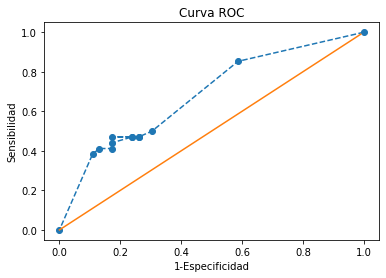

In [232]:
%matplotlib inline
plt.plot(specifities_1, sensitivities, marker ="o", linestyle= "--", )
S=[i*0.01 for i in range(100)]
E=[i*0.01 for i in range(100)]
plt.plot(S,E)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC") 
#la curva ROC puede hacerse más detallada usando ggplot 
##y se puede calcular el área bajo la curva ROC como metrica de desempeño del modelo

In [233]:
from sklearn import metrics
espc_1,sens, _ = metrics.roc_curve(Y_test, prob_df)
auc= metrics.auc(espc_1, sens)
auc

ValueError: y should be a 1d array, got an array of shape (80, 3) instead.

In [6]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")